# 第１章　基本的なクラスタリングを行う10本ノック

[pathlib reference](https://qiita.com/hasoya/items/9bfbcc973b131a7f69dc)
<br>
[sys.append reference](https://stackoverflow.com/questions/32239372/how-to-import-files-in-python-using-sys-path-append)

In [1]:
# Import essential Modules
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import sys
from pprint import pprint
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display # display results in nice format
import pathlib
# Disable __pychache__
sys.dont_write_bytecode =True

#%matplotlib widget
#%matplotlib ipympl
%matplotlib inline

In [2]:
__file__ = os.path.abspath('')
__file__
project_path = pathlib.Path(__file__).parent
sandbox_path = str(project_path/'sandbox')
sys.path.append(str(project_path))
sys.path.append(sandbox_path)
pprint(sys.path)
from useful_code import clean_print

['c:\\Users\\tatsu\\Documents\\project_workspace\\01_python_100knock_ai_model\\chapter-1',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\pywin32security',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\tatsu\\.ipython',
 'c:\\Users\\tatsu\\Documents\\project_workspace\\01_python_100knock_ai_model',
 'c:\\Users\\tatsu\\Documents\\project_workspace\\01_python_100knock_ai_model\\sandbox']


In [3]:
clean_print('hello world!', 'green')

## ノック1:k-meansで非階層型クラスタリングを実施してみよう




In [4]:
from sklearn.cluster import KMeans

In [5]:
iris = load_iris()
display(type(iris))
dir(iris)

sklearn.utils.Bunch

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
for i in dir(iris):
    clean_print(f'information about {i}')
    if type(iris[i]) == np.ndarray:
        print((iris[i])[:10]) # only print first 10 records
    else:
        print(iris[i])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


sklearn.datasets.data


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


iris.csv


None


[0 0 0 0 0 0 0 0 0 0]


['setosa' 'versicolor' 'virginica']


In [7]:
clean_print(f'data size:{iris.data.shape}', color='white')

In [8]:
clean_print(f'target names:{iris.target_names}', color='white')

In [9]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df_temp = df_iris.copy()
df_temp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


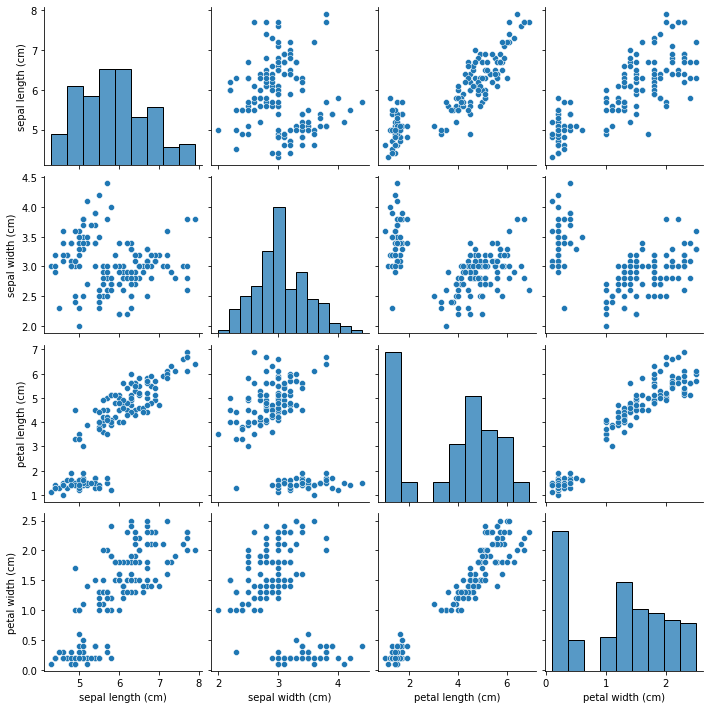

In [12]:
sns.pairplot(df_temp)

In [13]:

model = KMeans(n_clusters=3, random_state=0, init='random')
cls_data = df_iris.copy()
model.fit(cls_data)

KMeans(init='random', n_clusters=3, random_state=0)

In [14]:
cluster = model.predict(cls_data)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [15]:
cls_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
cls_data['cluster'] = cluster
cls_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


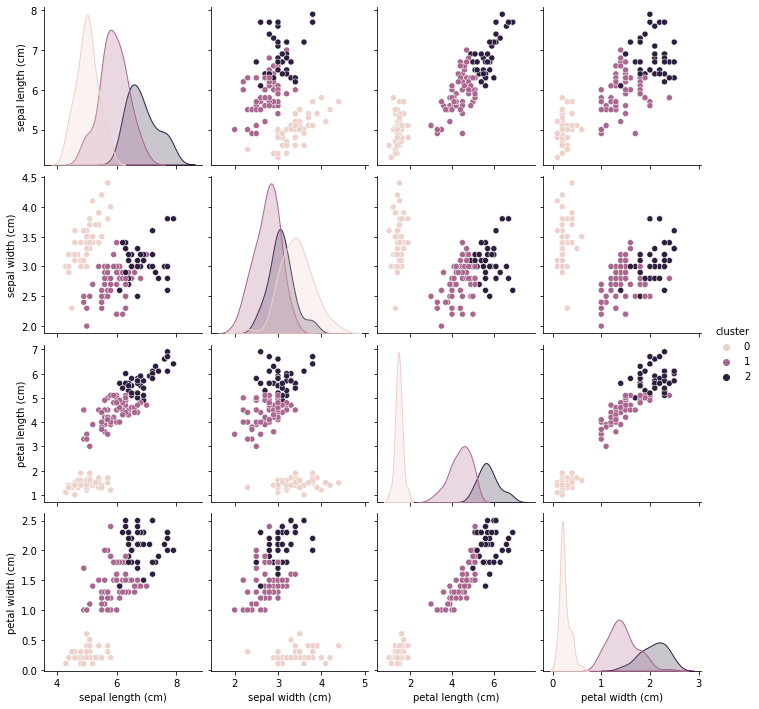

In [17]:
sns.pairplot(cls_data,hue='cluster')

In [18]:
cluster_center = pd.DataFrame(model.cluster_centers_) # get center for each cluster
cluster_center.columns = cls_data.columns[:4] # give column names
cluster_center

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


In [19]:
# KMeans() have following things
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algorithm',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_n_init',
 '_n_threads',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tol',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'cluster_centers_',
 'copy_x',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'inertia_',
 'init',
 'labels_',
 'max_iter',
 'n_clusters',
 'n_features_in_',
 'n_init',
 'n_iter_',

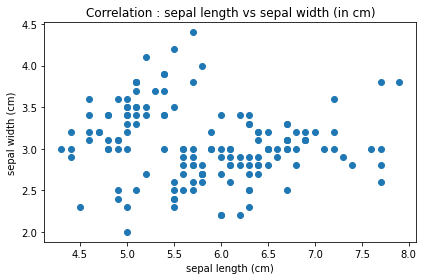

In [20]:
fig = plt.figure(facecolor="white", edgecolor="white", linewidth=2)
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Correlation : sepal length vs sepal width (in cm)')
#fig.set_facecolor('red')
plt.tight_layout()

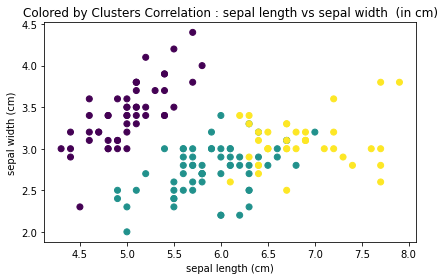

In [21]:
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'], c=cls_data.cluster)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Colored by Clusters Correlation : sepal length vs sepal width  (in cm)')
plt.tight_layout()


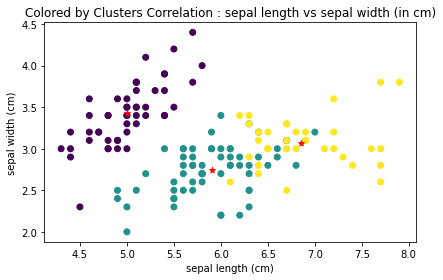

In [22]:
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'], c=cls_data.cluster)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Colored by Clusters Correlation : sepal length vs sepal width (in cm)')
plt.scatter(cluster_center['sepal length (cm)'],cluster_center['sepal width (cm)'], marker='*', color='red')
plt.tight_layout()

In [23]:
display(cls_data.groupby("cluster").mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [24]:
# Create a target column that labels the classifications
cls_data['target'] = iris.target
cls_data.loc[cls_data['target']==0,'target'] = 'setosa'
cls_data.loc[cls_data['target']==1,'target'] = 'versicolor'
cls_data.loc[cls_data['target']==2,'target'] = 'virginica'
display(cls_data.groupby('target').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


## ノック2:クラスタリングの結果を評価してみよう

In [25]:
# import modules that gives scores to the model
from sklearn.metrics import accuracy_score, adjusted_rand_score


In [26]:
# High ARI means iris.target and cls_data.cluster are very close to each other
# High Accuracy means that labels are properly classfied
ari = 'ARI: {:.2f}'.format(adjusted_rand_score(iris.target,cls_data.cluster))
accuracy = 'Accuracy:{:.2f}'.format(accuracy_score(iris.target,cls_data.cluster))
print(ari)
print(accuracy)

ARI: 0.73
Accuracy:0.89


In [27]:
ari = f'ARI: {adjusted_rand_score(iris.target,cls_data.cluster):.2f}'
accuracy = f'Accuracy:{accuracy_score(iris.target,cls_data.cluster):.2f}'
print(ari)
print(accuracy)

ARI: 0.73
Accuracy:0.89


## ノック3:k-means++で非階層型クラスタリングを実施してみよう




### Adjust initial centroid position so that learning is properly made

In [28]:
model = KMeans(n_clusters=3, init='k-means++',random_state=0)
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster
cls_data['target'] = iris.target
cls_data.loc[cls_data['target']==0,'target'] = 'setosa'
cls_data.loc[cls_data['target']==1,'target'] = 'versicolor'
cls_data.loc[cls_data['target']==2,'target'] = 'virginica'


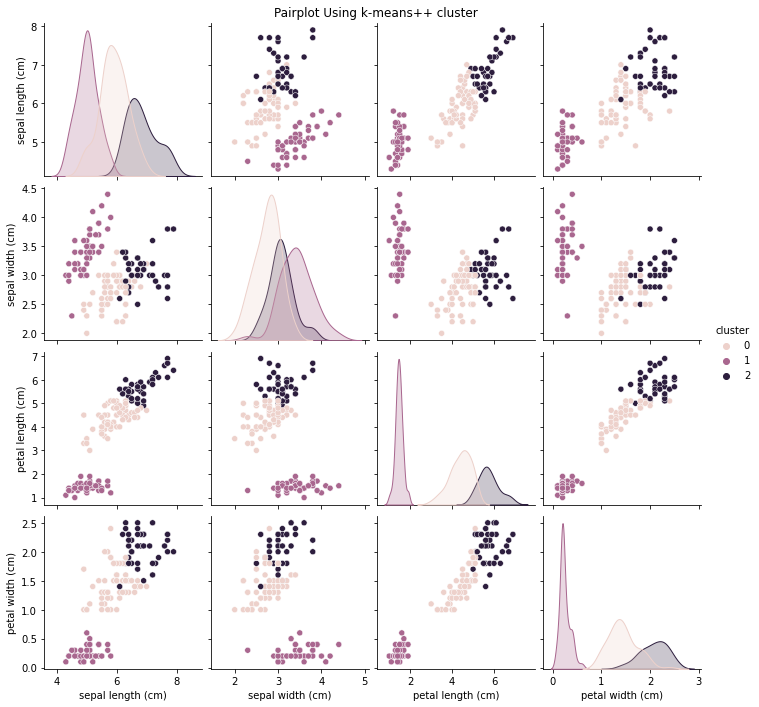

In [29]:
adjusted_pairplot = sns.pairplot(cls_data,hue='cluster')
adjusted_pairplot.fig.suptitle('Pairplot Using k-means++ cluster')
adjusted_pairplot.tight_layout()

In [30]:
ari = f'ARI: {adjusted_rand_score(iris.target,cls_data.cluster):.2f}'
ari

'ARI: 0.73'

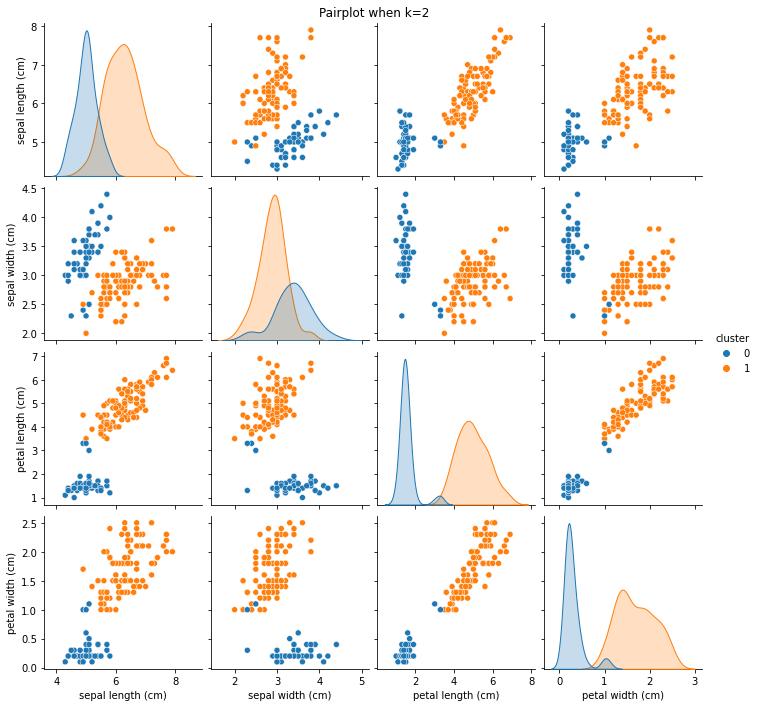

In [31]:
# Change number of clusters to 2 (wrong number)
model = KMeans(n_clusters=2,random_state=0)
cls_data = df_iris.copy()
cls_data['cluster'] = model.fit_predict(cls_data)
cls_data['target'] = iris.target
cls_data.loc[cls_data['target']==0,'target'] = 'setosa'
cls_data.loc[cls_data['target']==1,'target'] = 'versicolor'
cls_data.loc[cls_data['target']==2,'target'] = 'virginica'
# Create plot
wrong_cluster_pairplot = sns.pairplot(cls_data,hue='cluster')
wrong_cluster_pairplot.fig.suptitle('Pairplot when k=2 ')
wrong_cluster_pairplot.tight_layout()


In [32]:
ari = f'ARI: {adjusted_rand_score(iris.target,cls_data.cluster):.2f}'
ari

'ARI: 0.54'

## ノック4:エルボー法で最適なクラスター数を探索してみよう  




In [33]:
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing


$$
p(x) = \sum_{i=1}^k \pi_i \mathcal{N}(\mu_i, \Sigma_i)
$$

[make_blobs reference](https://stats.stackexchange.com/questions/534543/what-is-the-meaning-of-isotropic-gaussian-blobs-which-are-generated-by-sklearn)

![エビフライトライアングル](C:\Users\tatsu\Documents\project_workspace\01_python_100knock_ai_model\figure\Screenshot 2022-04-12 213910_make_blobs_details.png "サンプル")

In [34]:
X,y = make_blobs(n_samples=150, # numver of total samples
                n_features=2, # demention of the explanatory features
                centers=3, # number of clusters
                cluster_std=0.5, # std of the cluster
                shuffle=True,
                random_state=0
)
X


array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

Text(0.5, 1.0, 'Sample Cluster')

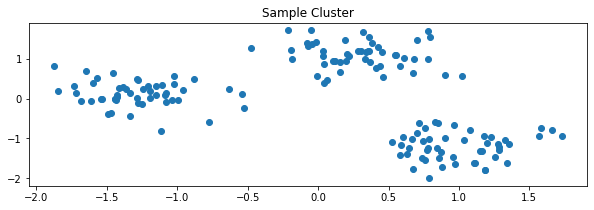

In [35]:
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x=X_norm[:,0]
y=X_norm[:,1]
plt.figure(figsize=(10,3))
plt.scatter(x,y)
plt.title('Sample Cluster')

In [36]:
distortions = []
for i in range(1,11): 
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_norm)
    distortions.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


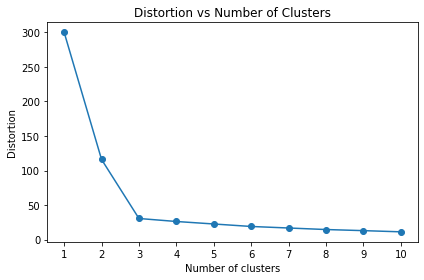

In [37]:
plt.plot(range(1,11), distortions, marker="o")
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.title("Distortion vs Number of Clusters")
plt.tight_layout()

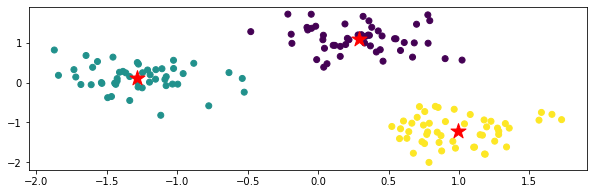

In [38]:
km = KMeans(n_clusters=3,
                n_init=10,
                max_iter=300,
                random_state=0)
z_km=km.fit(X_norm)    
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:,0],z_km.cluster_centers_[:,1],s=250, marker="*",c="red")

50
50
50


([<matplotlib.axis.YTick at 0x2b6de6e4e88>,
 [Text(0, 25.0, '1'), Text(0, 75.0, '2'), Text(0, 125.0, '3')])

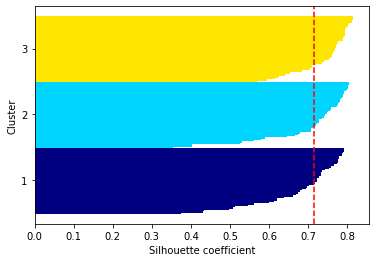

In [39]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels=np.unique(z_km.labels_)
n_clusters=cluster_labels.shape[0]

silhouette_vals=silhouette_samples(X, z_km.labels_,metric="euclidean")

y_ax_lower,y_ax_upper=0,0
yticks=[]

for i,c in enumerate(cluster_labels):
  c_silhouette_vals=silhouette_vals[z_km.labels_==c]
  print(len(c_silhouette_vals))
  c_silhouette_vals.sort()
  y_ax_upper +=len(c_silhouette_vals)
  color=cm.jet(float(i)/n_clusters)
  plt.barh(range(y_ax_lower,y_ax_upper),
           c_silhouette_vals,
           height=1.0,
           edgecolor="none",
           color=color
          )
  yticks.append((y_ax_lower+y_ax_upper)/2.)
  y_ax_lower += len(c_silhouette_vals)

silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.yticks(yticks,cluster_labels + 1)    

## ノック5:シルエット分析で最適なクラスター数を探索してみよう




## ノック6:階層型クラスタリングを実施してみよう

## ノック7:樹形図(デンドログラム)を解釈してみよう

## ノック8:最短距離法で階層型クラスタリングを実施してみよう

## ノック9:最長距離法で階層型クラスタリングを実施してみよう

## ノック10:群平均法で階層型クラスタリングを実施してみよう